# Unsupervised Learning on Country Data
# Goal: Categorize the countries using socio-economic and health factors that determine the overall development of the country.

In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
countries = pd.read_csv("countries.csv")
countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
"""Initializes K centroids"""
def kMeansInitCentroids(X, K):
    np.random.shuffle(X) # Randomly reorder the indices
    centroids = X[:K, :] # Take the first K examples
    return centroids

In [4]:
"""Return closest centroid for every example in the variable idx. 
Each row in X is a single example. idx = m x 1 vector."""
def findClosestCentroids(X, centroids):
    m, n = X.shape
    idx = np.zeros(m)
    for i in range(m):
        min_dist = np.sum(np.square((centroids - X[i, :])), axis=1)
        idx[i] = np.argmin(min_dist)
    return idx

In [5]:
"""Returns the new centroids by computing the means of the data points assigned to each centroid."""
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for j in range(K):
        sum_ex = np.sum(X[np.nonzero(idx == j)], axis=0) # sum over X examples that are assigned to cluster j
        total = X[np.nonzero(idx == j)].shape[0] # get total number of examples assigned to cluster j
        centroids[j, :] = np.reshape((sum_ex / total), (1, n))
    return centroids

In [6]:
def costFunction(X, idx, centroids):
    m, n = X.shape
    J = 0
    idx = idx.astype(int)
    for i in range(m):
        J += sum(np.square((centroids[idx[i]] - X[i, :])))
    J = 1 / m * J
    return J

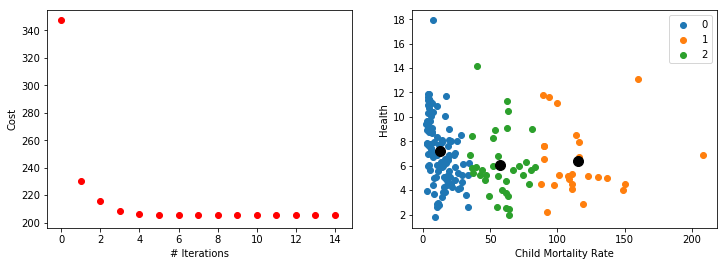

,0,1,2
0,Angola,Australia,Afghanistan
1,Antigua and Barbuda,Belize,Albania
2,Argentina,Cambodia,Algeria
3,Azerbaijan,"Congo, Dem. Rep.",Armenia
4,Bahamas,Cote d'Ivoire,Austria
...,...,...,...
101,Uzbekistan,NaN,NaN
102,Vanuatu,NaN,NaN
103,Venezuela,NaN,NaN
104,Yemen,NaN,NaN


In [25]:
data = countries[['child_mort', 'health']].to_numpy().astype(float) # convert to numpy
# data = countries.iloc[:, 1:].to_numpy().astype(float) # convert to numpy
# data = (data - data.mean(axis=0)) / data.std(axis=0) # Don't need to normalize
k = 3 # Number of clusters
max_iter = 15 # Max iterations
m, n = data.shape
cent = kMeansInitCentroids(data, k) # K x n

fig, ax = plt.subplots(1, 2, figsize=(12,4))
for iters in range(max_iter):
    index = findClosestCentroids(data, cent) # Assign data examples to clusters
    cent = computeCentroids(data, index, k) # move centroids
    cost = costFunction(data, index, cent)
    ax[0].scatter(iters, cost, c='r')
ax[0].set_xlabel("# Iterations")
ax[0].set_ylabel("Cost")

clustered_countries = countries.country.iloc[np.nonzero(index == 0)].reset_index().drop('index', axis=1)
clustered_countries.rename(columns={'country':'0'}, inplace=True)
for cluster in range(k):
    c = np.nonzero(index == cluster) # get indices where data examples are assigned to cluster 0
    plt.scatter(data[c, 0], data[c, 1], label=cluster)
    if cluster != 0:
        clustered_countries[cluster] = countries.country.iloc[c].reset_index().drop('index', axis=1)

ax[1].scatter(cent[:, 0], cent[:, 1], c='k', s=100)
ax[1].set_xlabel("Child Mortality Rate")
ax[1].set_ylabel("Health")
ax[1].legend()
plt.show()
clustered_countries